# Introduction

Customer churn is a major challenge for telecom companies, as it directly impacts revenue and growth. Churn occurs when customers discontinue their subscription, and predicting this behavior helps businesses take proactive steps to retain them.

In this notebook, we use the Telco Customer Churn dataset from Kaggle to build and evaluate multiple machine learning models. The goal is to predict whether a customer will churn or not, based on their demographics, account information, and service usage.

# Objective

The main objective of this project is to:

Analyze the Telco dataset and understand factors contributing to customer churn.

Preprocess and split the dataset into training and testing sets.

Apply different machine learning models to predict churn.

Compare model performance using Accuracy, Precision, Recall, F1-score, and ROC-AUC.

Visualize results with charts and confusion matrices.

Identify the best-performing model for churn prediction.

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score 
import keras 
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LeakyReLU,ELU
from keras.layers import Dropout

2025-09-21 14:59:05.286799: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758466745.466524      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758466745.520382      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# load the dataset
data=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
#checkinh the columns in dataset 
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# drop those columns which is the not best for models 
data.drop(columns=['customerID', 'TotalCharges'], inplace=True)

In [6]:
# checking the null values in dataset 
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [7]:
# check the duplicates values in dataset 
data.duplicated().sum()

27

In [8]:
# know drop the duplicated values from dataset 
data=data.drop_duplicates()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7016 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7016 non-null   object 
 1   SeniorCitizen     7016 non-null   int64  
 2   Partner           7016 non-null   object 
 3   Dependents        7016 non-null   object 
 4   tenure            7016 non-null   int64  
 5   PhoneService      7016 non-null   object 
 6   MultipleLines     7016 non-null   object 
 7   InternetService   7016 non-null   object 
 8   OnlineSecurity    7016 non-null   object 
 9   OnlineBackup      7016 non-null   object 
 10  DeviceProtection  7016 non-null   object 
 11  TechSupport       7016 non-null   object 
 12  StreamingTV       7016 non-null   object 
 13  StreamingMovies   7016 non-null   object 
 14  Contract          7016 non-null   object 
 15  PaperlessBilling  7016 non-null   object 
 16  PaymentMethod     7016 non-null   object 
 17  

In [10]:
# statistical summary of numerical columns
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7016.000000,7016.000000,7016.000000
mean,0.162628,32.462087,64.869897
std,0.369052,24.526687,30.055654
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.400000
75%,0.000000,55.000000,89.900000
max,1.000000,72.000000,118.750000


In [11]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

In [12]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

In [13]:
# checking the phone services count laves in dataset 
data['PhoneService'].value_counts()

PhoneService
Yes    6334
No      682
Name: count, dtype: int64

In [14]:
# checking the genders values 
data['gender'].value_counts()

gender
Male      3537
Female    3479
Name: count, dtype: int64

In [15]:
# Know checking the how many people have partner and single 
data['Partner'].value_counts()

Partner
No     3617
Yes    3399
Name: count, dtype: int64

In [16]:
# checking the internetservice available 
data['InternetService'].unique().tolist()

['DSL', 'Fiber optic', 'No']

In [17]:
# checking the values of internetservices
data['InternetService'].value_counts()

InternetService
Fiber optic    3089
DSL            2419
No             1508
Name: count, dtype: int64

In [18]:
data['MonthlyCharges'].value_counts()

MonthlyCharges
20.05     58
19.85     45
19.95     44
19.70     43
20.00     43
          ..
97.90      1
116.40     1
31.65      1
39.05      1
26.50      1
Name: count, Length: 1585, dtype: int64

In [19]:
# Convert 'Churn' to binary
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Convert 'TotalCharges' to numeric (handle errors)
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')

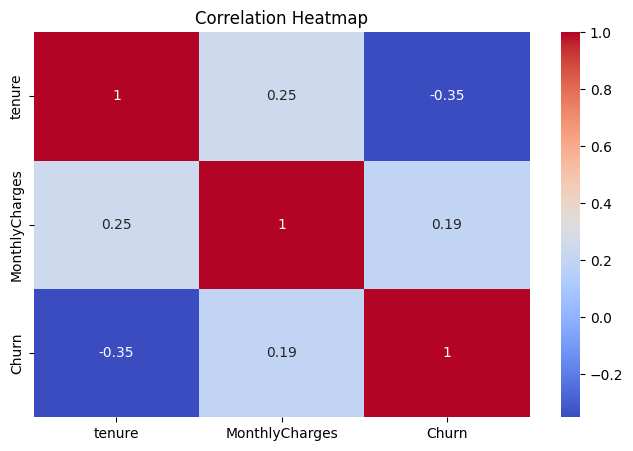

In [20]:
# Correlation heatmap (numerical columns)
plt.figure(figsize=(8, 5))
sns.heatmap(data[['tenure', 'MonthlyCharges', 'Churn']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


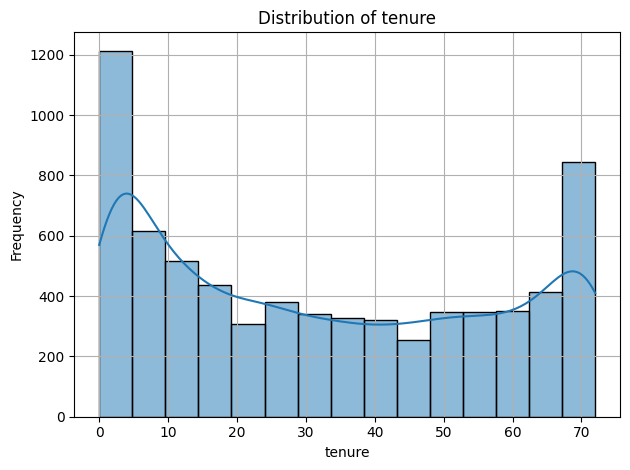

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


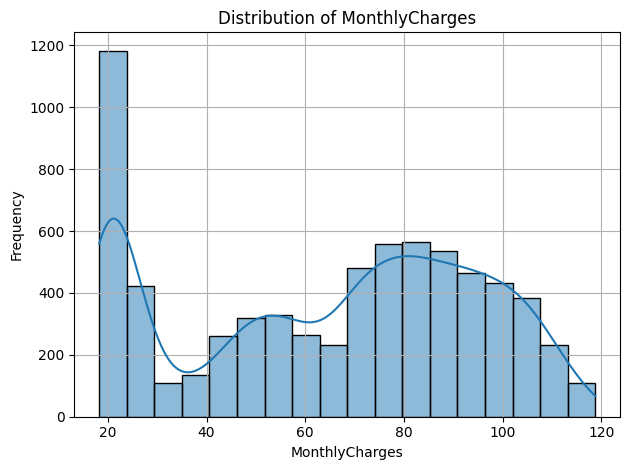

In [21]:
# Histograms of numerical features
numerical_cols = ['tenure', 'MonthlyCharges',]
for col in numerical_cols:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [22]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

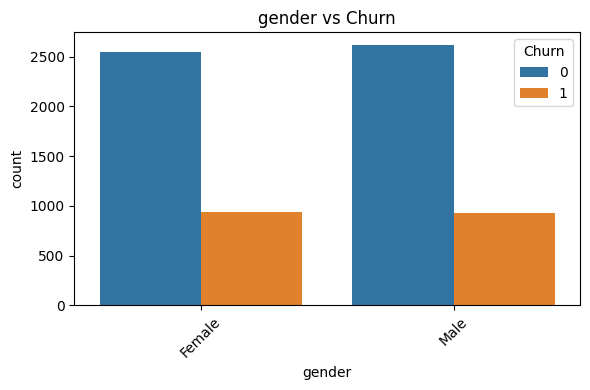

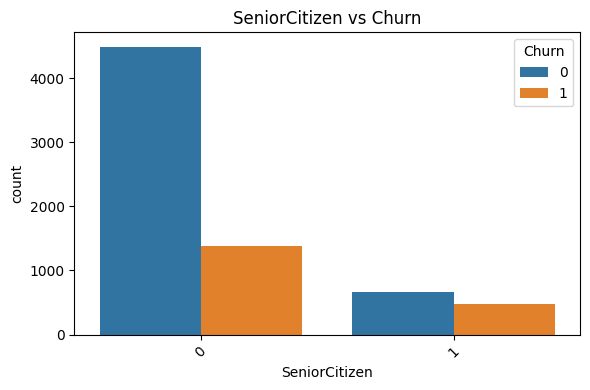

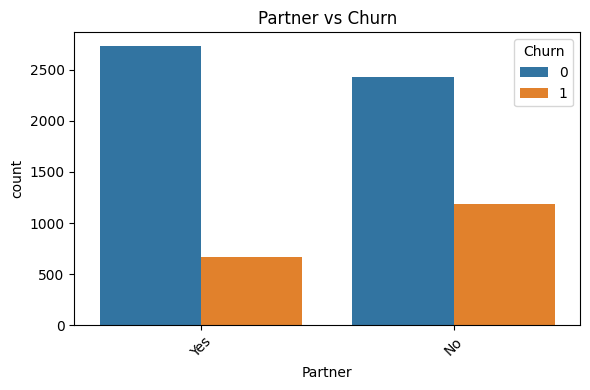

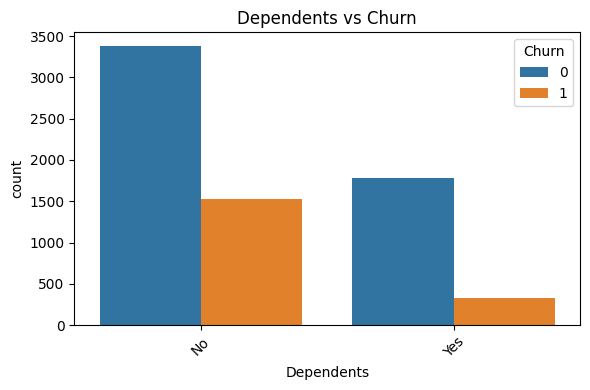

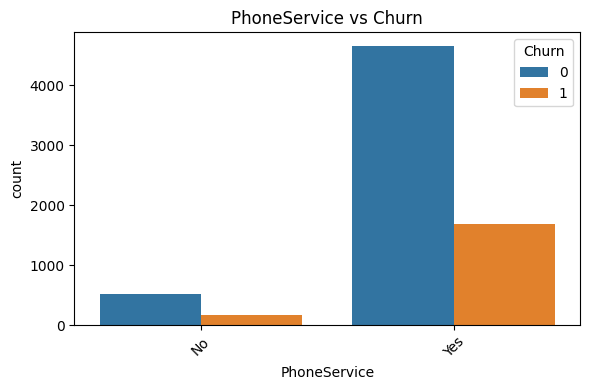

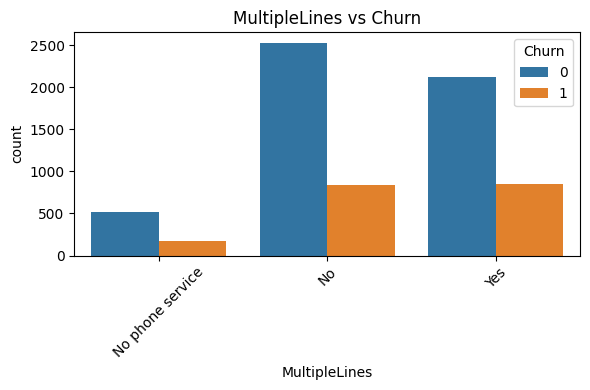

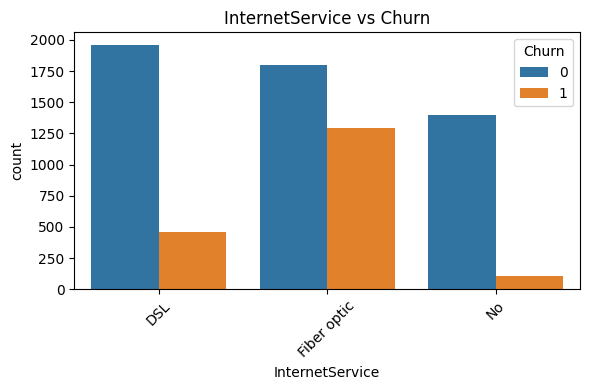

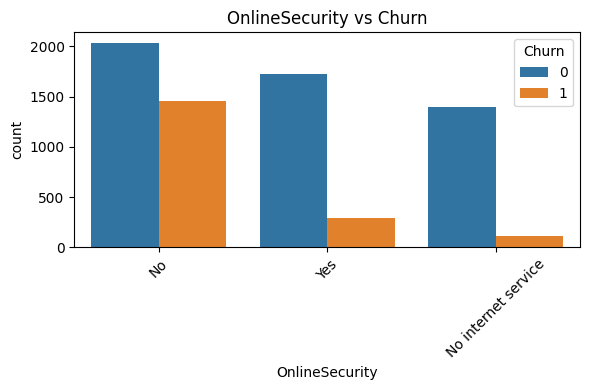

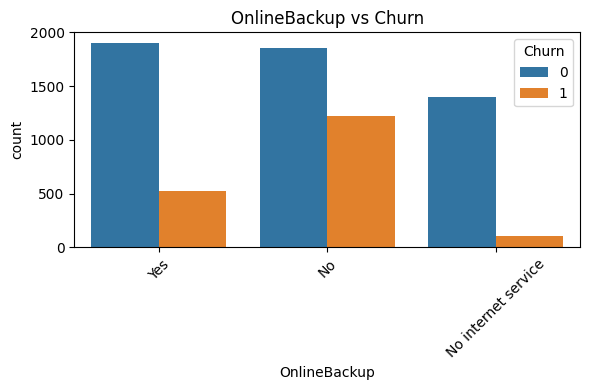

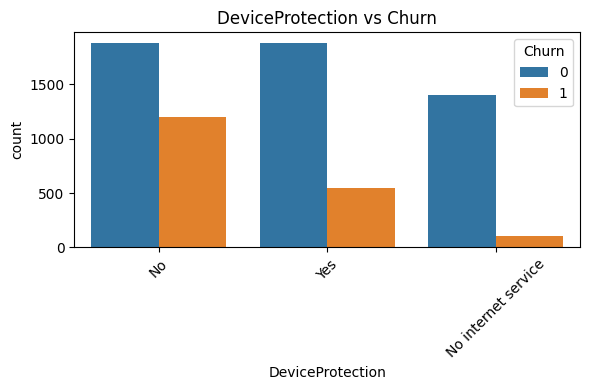

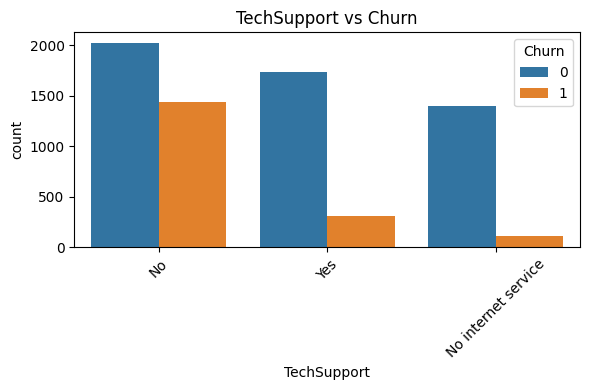

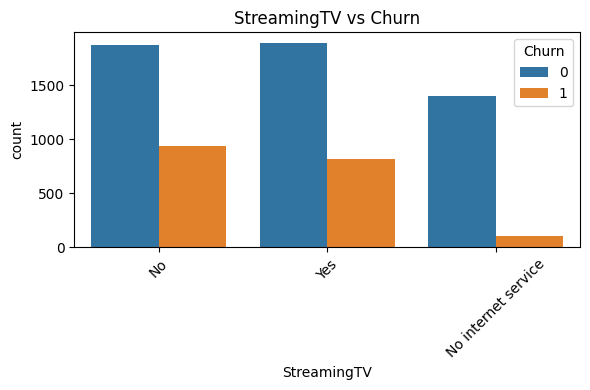

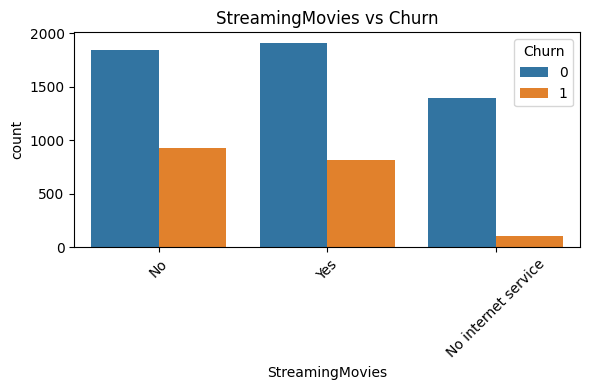

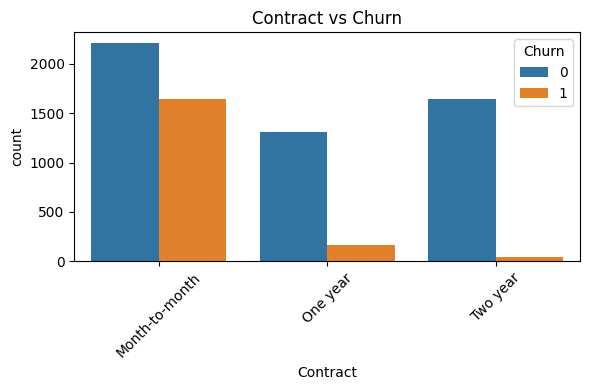

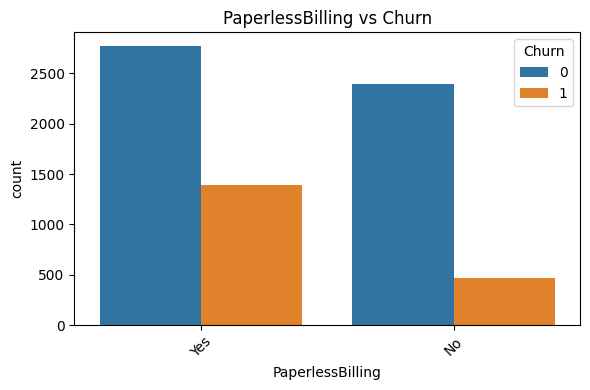

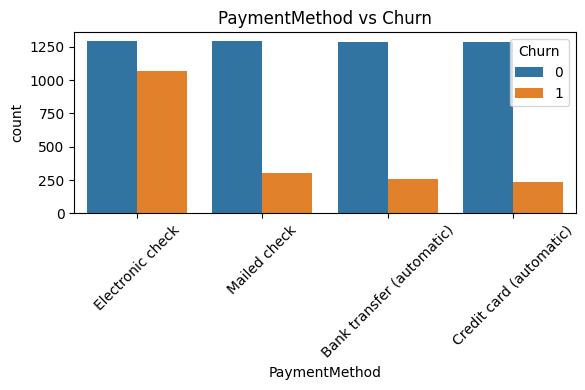

In [23]:
# Categorical variables countplots vs Churn
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]
# Safe EDA loop for categorical columns
for col in categorical_cols:
    if data[col].isnull().all():
        print(f"Skipping {col} - all values are missing.")
        continue

    if data[col].nunique() == 0:
        print(f"Skipping {col} - no unique values.")
        continue

    plt.figure(figsize=(6, 4))
    try:
        sns.countplot(data=data, x=col, hue='Churn')
        plt.title(f'{col} vs Churn')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not plot {col} due to: {e}")


In [24]:
# Encoding change the string columns in numerical 
ec=LabelEncoder()
data['gender']=ec.fit_transform(data['gender'])
data['Partner']=ec.fit_transform(data['Partner'])
data['Dependents']=ec.fit_transform(data['Dependents'])
data['PhoneService']=ec.fit_transform(data['PhoneService'])
data['MultipleLines']=ec.fit_transform(data['MultipleLines'])
data['InternetService']=ec.fit_transform(data['InternetService'])
data['OnlineSecurity']=ec.fit_transform(data['OnlineSecurity'])
data['OnlineBackup']=ec.fit_transform(data['OnlineBackup'])
data['DeviceProtection']=ec.fit_transform(data['DeviceProtection'])
data['TechSupport']=ec.fit_transform(data['TechSupport'])
data['StreamingTV']=ec.fit_transform(data['StreamingTV'])
data['StreamingMovies']=ec.fit_transform(data['StreamingMovies'])
data['Contract']=ec.fit_transform(data['Contract'])
data['PaperlessBilling']=ec.fit_transform(data['PaperlessBilling'])
data['PaymentMethod']=ec.fit_transform(data['PaymentMethod'])

In [25]:
# feature selection 
X=data.drop('Churn',axis=1)
y=data['Churn']

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
#sc=StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)

In [28]:
X_train.shape

(5612, 18)

In [29]:
model=Sequential()
model.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu',input_dim=18))
model.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758466760.825863      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100


I0000 00:00:1758466764.587598      61 service.cc:148] XLA service 0x7a99b4010ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758466764.588501      61 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1758466764.944934      61 cuda_dnn.cc:529] Loaded cuDNN version 90300


 69/376 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5774 - loss: 2.3370

I0000 00:00:1758466765.695191      61 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


376/376 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6856 - loss: 1.0510 - val_accuracy: 0.7743 - val_loss: 0.4785
Epoch 2/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7446 - loss: 0.5081 - val_accuracy: 0.7819 - val_loss: 0.4690
Epoch 3/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7737 - loss: 0.4781 - val_accuracy: 0.7732 - val_loss: 0.4650
Epoch 4/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7739 - loss: 0.4705 - val_accuracy: 0.7900 - val_loss: 0.4522
Epoch 5/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7884 - loss: 0.4544 - val_accuracy: 0.7873 - val_loss: 0.4451
Epoch 6/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7938 - loss: 0.4459 - val_accuracy: 0.7916 - val_loss: 0.4367
Epoch 7/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7850 - loss: 0.4505 - val_accuracy: 0.7910 - val_loss: 0.4320
Epoch 8/100
376/376 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7906 - loss: 0.4483 - val_accuracy: 0.7835

In [32]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [33]:
cm=confusion_matrix(y_test,y_pred)

In [34]:
score=accuracy_score(y_test,y_pred)
print(score)

0.8034188034188035


# Linear Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Model initialize
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

# Evaluate
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Logistic Regression Results:
Accuracy: 0.7535612535612536
Precision: 0.4900181488203267
Recall: 0.8059701492537313
F1 Score: 0.6094808126410836
ROC-AUC: 0.855465423118272


# DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')

# Train
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

# Evaluate
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Decision Tree Results:
Accuracy: 0.75
Precision: 0.484251968503937
Recall: 0.7343283582089553
F1 Score: 0.5836298932384342
ROC-AUC: 0.8247657875263532


# RANDOM FOREST CLASSIFIER

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Evaluate
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Random Forest Results:
Accuracy: 0.7870370370370371
Precision: 0.5697674418604651
Recall: 0.4388059701492537
F1 Score: 0.49578414839797635
ROC-AUC: 0.820112254443405


# Support Vector Machine (SVM)

In [38]:
from sklearn.svm import SVC

# Initialize SVM (with probability=True for ROC-AUC)
svm = SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')

# Train
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:,1]

# Evaluate
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


SVM Results:
Accuracy: 0.74002849002849
Precision: 0.4731182795698925
Recall: 0.7880597014925373
F1 Score: 0.5912653975363942
ROC-AUC: 0.8391550200354634


# Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train
gb.fit(X_train, y_train)

# Predict
y_pred = gb.predict(X_test)
y_prob = gb.predict_proba(X_test)[:,1]

# Evaluate
print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Gradient Boosting Results:
Accuracy: 0.8141025641025641
Precision: 0.635036496350365
Recall: 0.5194029850746269
F1 Score: 0.5714285714285714
ROC-AUC: 0.8538165114558173


<Figure size 600x400 with 0 Axes>

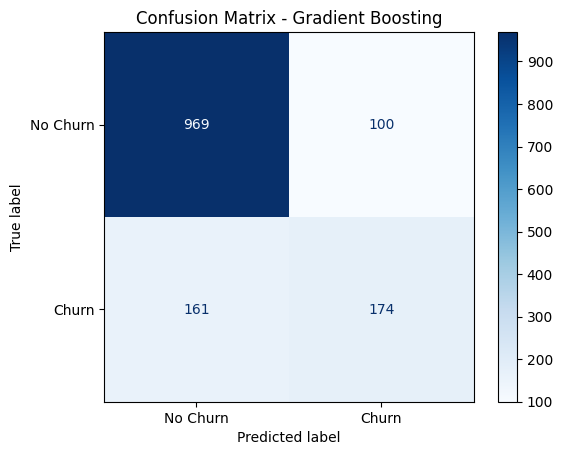

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Gradient Boosting
cm = confusion_matrix(y_test, y_pred)   
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])

plt.figure(figsize=(6,4))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


# XGBoost Classifier

In [41]:
from xgboost import XGBClassifier

# Initialize XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

# Evaluate
print("XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


XGBoost Results:
Accuracy: 0.8034188034188035
Precision: 0.5993265993265994
Recall: 0.5313432835820896
F1 Score: 0.5632911392405063
ROC-AUC: 0.838179076553621


In [42]:
import pandas as pd

# Store results
results = {
    "ANN": 0.754,
    "Logistic Regression": 0.753,
    "Decision Tree": 0.750,
    "Random Forest": 0.790,
    "SVM": 0.747,
    "Gradient Boosting": 0.814,
    "XGBoost": 0.803
}

# Convert to DataFrame
df_results = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Sort by accuracy
df_results = df_results.sort_values(by="Accuracy", ascending=False)

print(df_results)


                 Model  Accuracy
5    Gradient Boosting     0.814
6              XGBoost     0.803
3        Random Forest     0.790
0                  ANN     0.754
1  Logistic Regression     0.753
2        Decision Tree     0.750
4                  SVM     0.747


# Accuracy chart


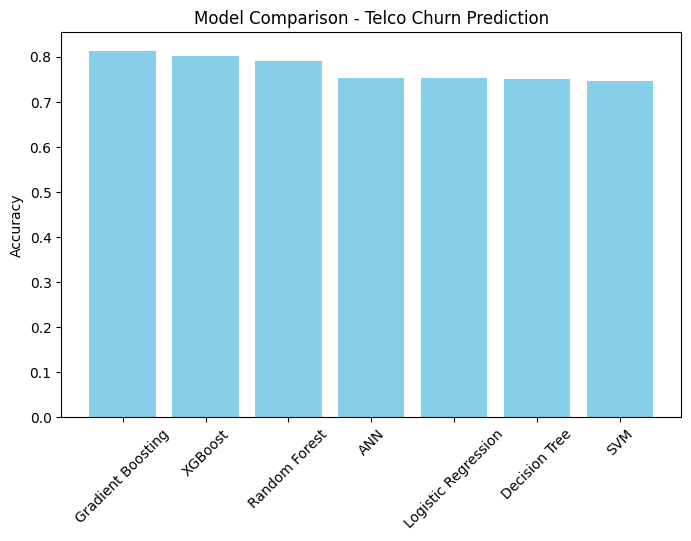

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df_results["Model"], df_results["Accuracy"], color="skyblue")
plt.xticks(rotation=45)
plt.title("Model Comparison - Telco Churn Prediction")
plt.ylabel("Accuracy")
plt.show()


# Comparison chart

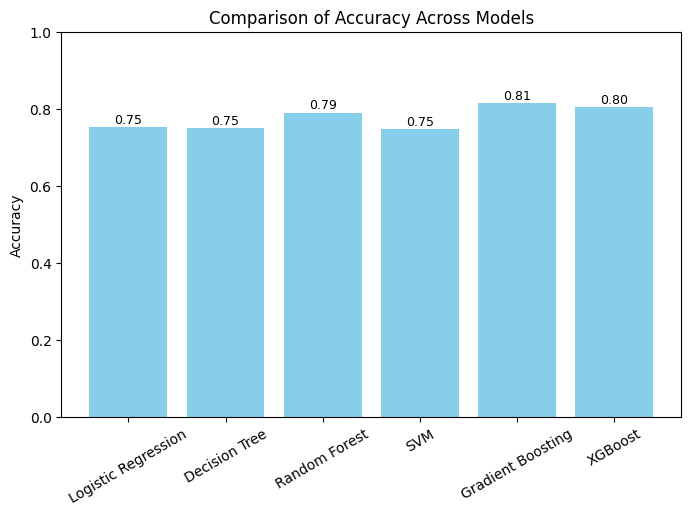

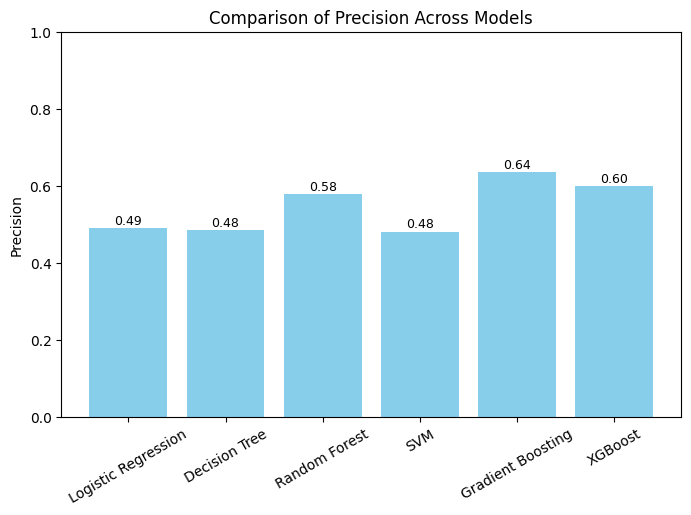

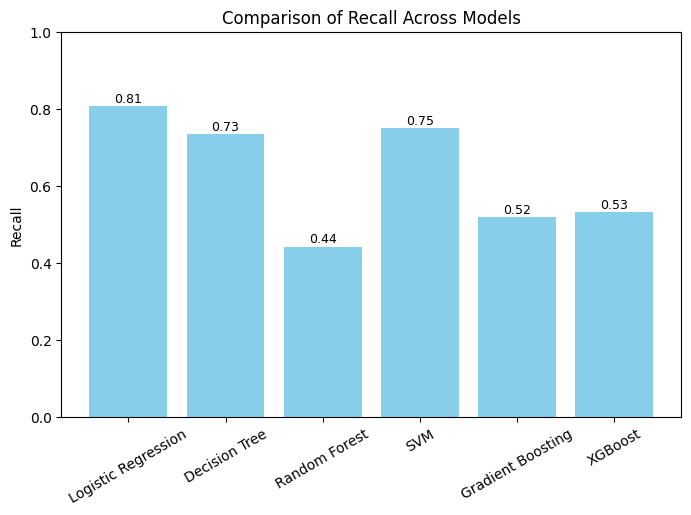

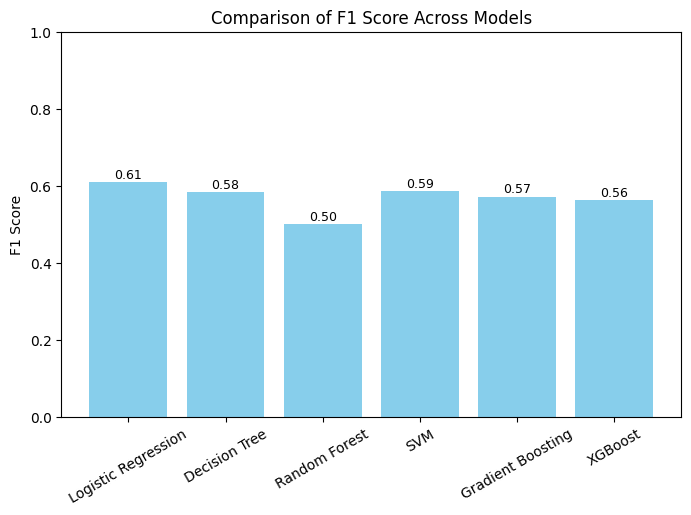

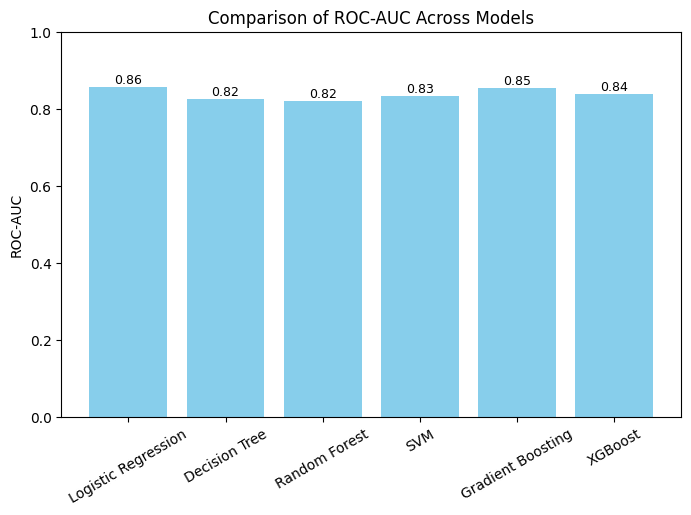

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Tumhare results dictionary (same as before)
results = {
    "Logistic Regression": {
        "Accuracy": 0.7528,
        "Precision": 0.4891,
        "Recall": 0.8059,
        "F1 Score": 0.6088,
        "ROC-AUC": 0.8554
    },
    "Decision Tree": {
        "Accuracy": 0.7500,
        "Precision": 0.4843,
        "Recall": 0.7343,
        "F1 Score": 0.5836,
        "ROC-AUC": 0.8248
    },
    "Random Forest": {
        "Accuracy": 0.7899,
        "Precision": 0.5781,
        "Recall": 0.4418,
        "F1 Score": 0.5008,
        "ROC-AUC": 0.8199
    },
    "SVM": {
        "Accuracy": 0.7472,
        "Precision": 0.4808,
        "Recall": 0.7493,
        "F1 Score": 0.5858,
        "ROC-AUC": 0.8317
    },
    "Gradient Boosting": {
        "Accuracy": 0.8141,
        "Precision": 0.6350,
        "Recall": 0.5194,
        "F1 Score": 0.5714,
        "ROC-AUC": 0.8539
    },
    "XGBoost": {
        "Accuracy": 0.8034,
        "Precision": 0.5993,
        "Recall": 0.5313,
        "F1 Score": 0.5633,
        "ROC-AUC": 0.8382
    }
}

# Metrics list
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]

for metric in metrics:
    plt.figure(figsize=(8,5))
    model_names = list(results.keys())
    values = [results[m][metric] for m in model_names]

    bars = plt.bar(model_names, values, color="skyblue")
    plt.ylim(0, 1)
    plt.title(f"Comparison of {metric} Across Models")
    plt.ylabel(metric)

    # values upar likhna
    for bar, val in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f"{val:.2f}", ha='center', fontsize=9)

    plt.xticks(rotation=30)
    plt.show()
